#                              Machine Leaning (Spring 2023)
##                                  Hands on 6 :


*   Model Selection
*   Feature Selection
*   Dimensionality Reduction
*   K-means Clustering
*   Expectation-Maximization






# Model Selection


There are different functions available in this [link](https://scikit-learn.org/stable/model_selection.html) for finding suitable values for hyperparameters using various search methods. Here, we have tested all the values through Exhaustive searching and obtained the best value.



In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [7]:
# Define hyperparameters to search over
hyperparams = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestRegressor()

# Use grid search to find best hyperparameters
grid_search = GridSearchCV(rf, hyperparams, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

rf_best = RandomForestRegressor(**grid_search.best_params_)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error (random forest regressor): {mse:.2f}")

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean squared error (random forest regressor): 0.35


##Learning curve

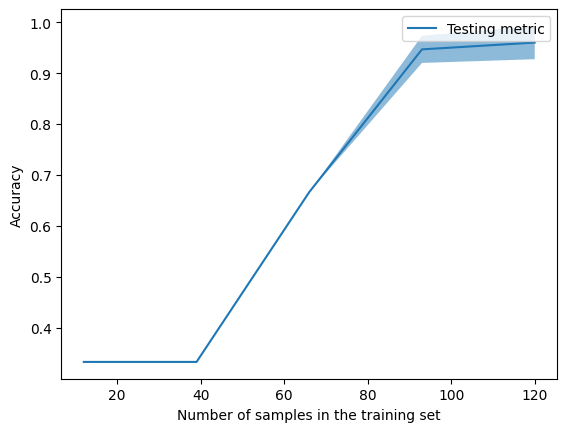

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
tree = DecisionTreeClassifier(random_state=0)
train_sizes, train_scores, test_scores = learning_curve(tree, X, y)
display = LearningCurveDisplay(train_sizes=train_sizes,
train_scores=train_scores, test_scores=test_scores, score_name="Accuracy")
display.plot()

plt.show()

# Feature Selection

There are different methods for selecting the best features, both supervised and unsupervised, such as checking the correlation with the target variable or selecting the variable with the highest variance, and so on.
In this [link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection), there are different functions available for these methods, which can be used to obtain the best features using various criteria.

In [80]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)
df = df.drop(0, axis=1)
df.columns = ['target'] +  [f'feature_{i}' for i in range(1, 31)]
df['target'] = df['target'].map({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=0)

By using all the features, we achieve the following accuracy.

In [81]:

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


Now, We will select the top k features using the chi2 score method.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [85]:

# Instantiate feature selector
selector = SelectKBest(chi2, k=10)

# Fit selector to training data
selector.fit(X_train, y_train)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Get names of selected features

selected_features_names = X_train.columns[selected_features_indices]
print(f"Selected features: {selected_features_names}")

Selected features: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_13',
       'feature_14', 'feature_21', 'feature_22', 'feature_23', 'feature_24'],
      dtype='object')


In [86]:
# Train random forest classifier with selected features
rf_best = RandomForestClassifier(n_estimators=100, random_state=0)
rf_best.fit(X_train[selected_features_names], y_train)


y_pred = rf_best.predict(X_test[selected_features_names])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


Another method is to use different machine learning algorithms for feature selection, and in fact, after training the model, the best features are selected using its parameters and weights. Here, we use the Random Forest algorithm for this purpose.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [88]:

# Instantiate feature selector
selector = SelectFromModel(rf, threshold='median')

# Fit selector to training data
selector.fit(X_train, y_train)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Get names of selected features

selected_features_names = X_train.columns[selected_features_indices]
print(f"Selected features: {selected_features_names}")

Selected features: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_7',
       'feature_8', 'feature_11', 'feature_13', 'feature_14', 'feature_21',
       'feature_23', 'feature_24', 'feature_26', 'feature_27', 'feature_28'],
      dtype='object')


In [89]:
# Train random forest classifier with selected features
rf_best = RandomForestClassifier(n_estimators=100, random_state=0)
rf_best.fit(X_train[selected_features_names], y_train)


y_pred = rf_best.predict(X_test[selected_features_names])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


# Dimensionality Reduction

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [67]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
target_index = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
y = [target_index[t] for t in y]

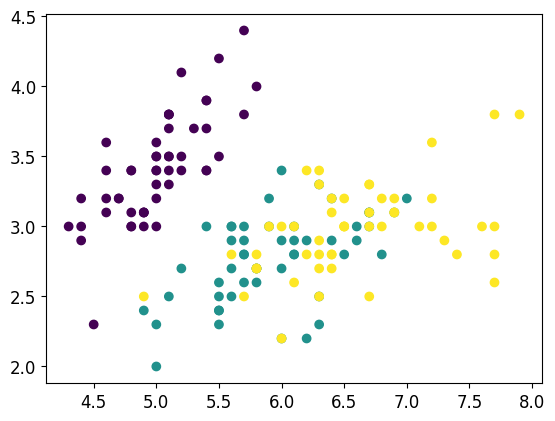

In [72]:
plt.scatter(X[:,0],X[:,1],c=y)

## LDA


In [73]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [52]:
lda.explained_variance_ratio_

array([0.99147248, 0.00852752])

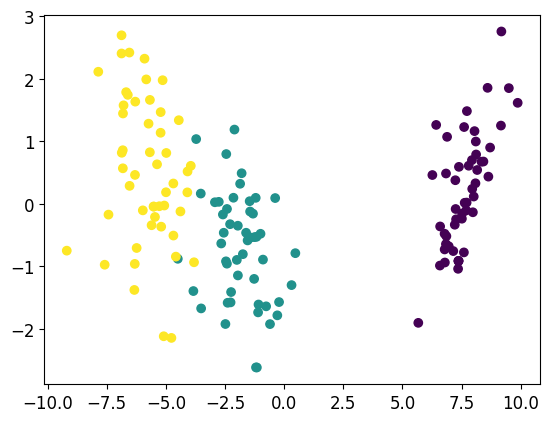

In [75]:
plt.scatter(X_r2[:,0],X_r2[:,1],c=y);

## PCA


In [76]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

In [78]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

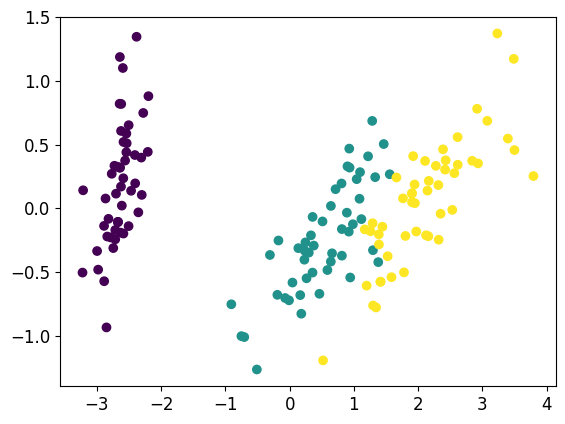

In [77]:
plt.scatter(X_r[:,0],X_r[:,1],c=y);

To explain the differences between PCA and LDA, you can compare the resulting plots. In PCA, the data points are transformed to a new coordinate system where the first principal component explains the maximum variance in the data. In LDA, the data points are transformed to a new coordinate system where the classes are separated as much as possible. Therefore, if your goal is to reduce the dimensionality of your data while maintaining the maximum variance, you should use PCA. However, if your goal is to classify your data into different classes, you should use LDA.

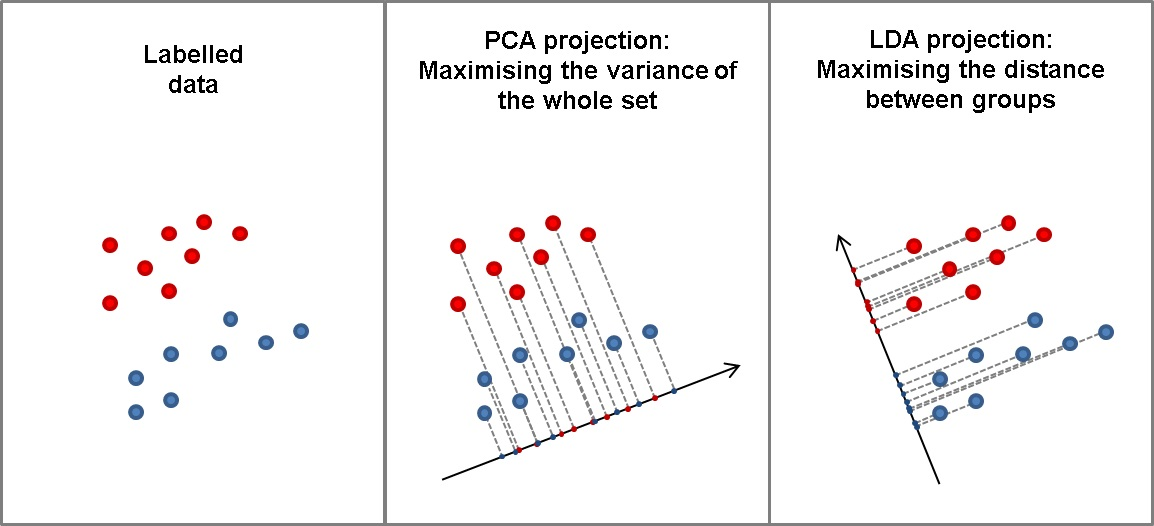

# Clustering

In [6]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

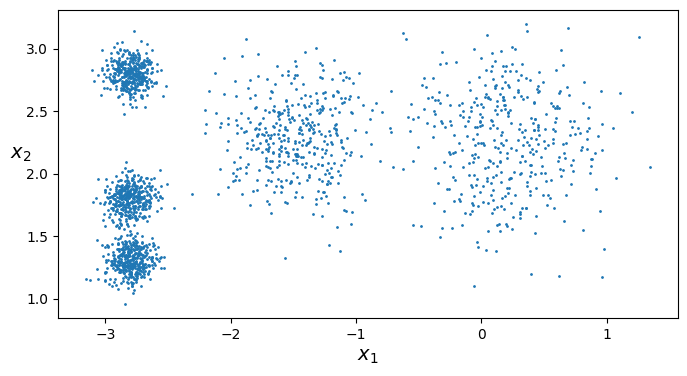

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into [Voronoi cells](https://en.wikipedia.org/wiki/Voronoi_diagram). k-Means minimizes within-cluster variances (squared Euclidean distances).

In [10]:
from sklearn.cluster import KMeans

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


If you plot the cluster’s decision boundaries:

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

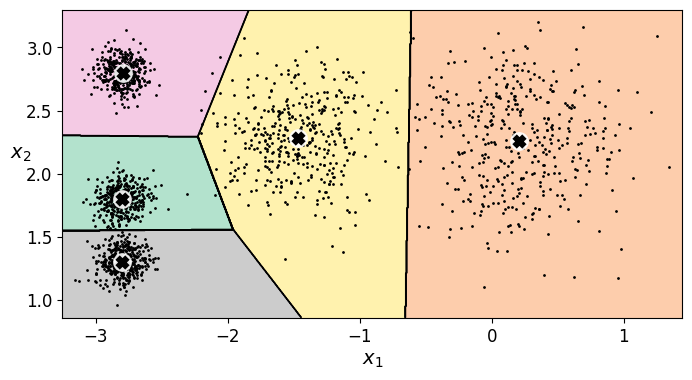

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [18]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

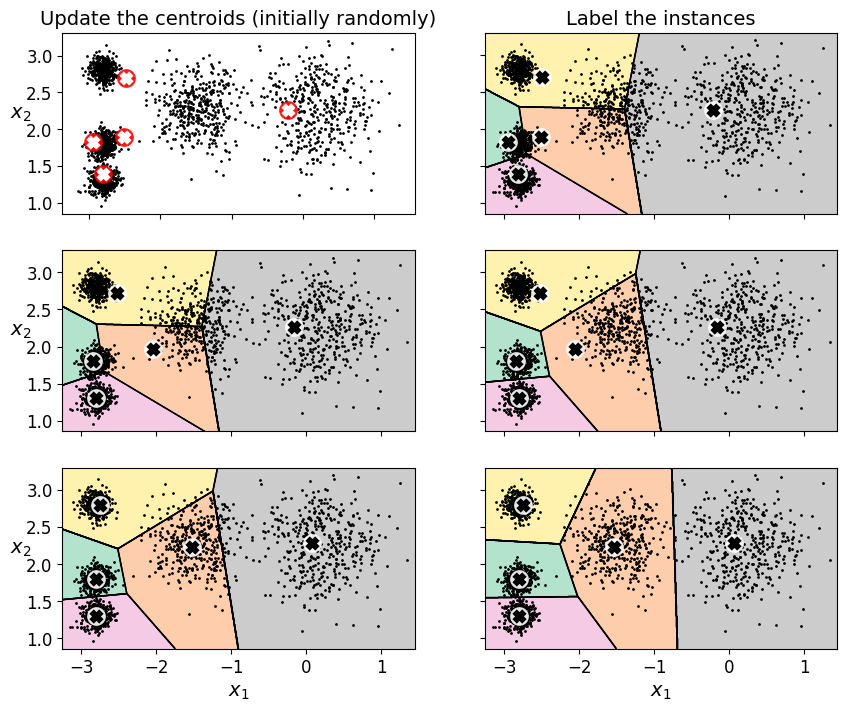

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

What if the number of clusters was set to a lower or greater value than 5?



In [24]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


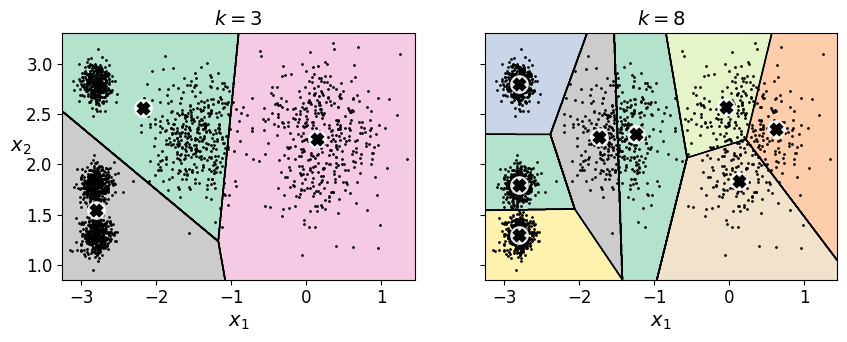

In [25]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

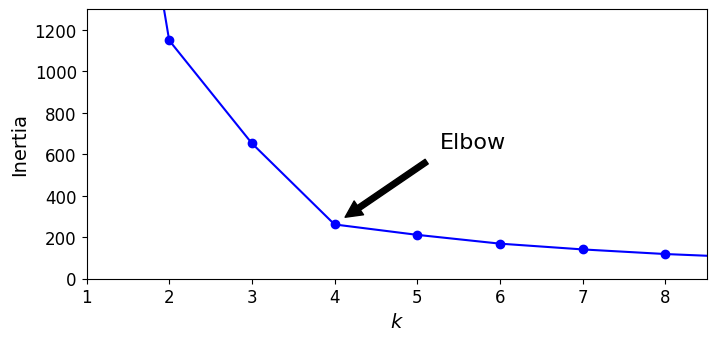

In [27]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# Expectation-Maximization

<ipython-input-5-ba26dce44f9d>:28: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)


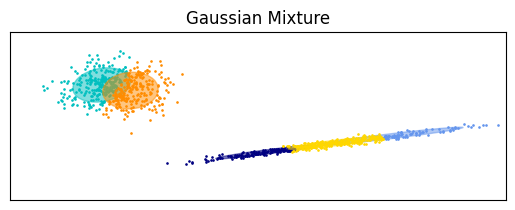

In [5]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])

        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(13)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]


gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

plt.show()



<ipython-input-3-d0afbdb0ff8a>:28: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)


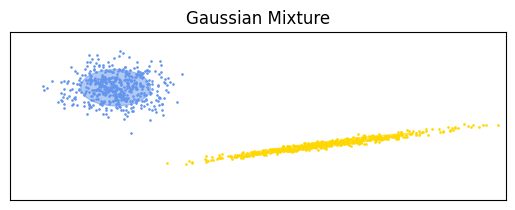

In [4]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

plt.show()